In [15]:
import pandas as pd


movies = pd.read_csv("../data/raw/tmdb_5000_movies.csv")
credits = pd.read_csv("../data/raw/tmdb_5000_credits.csv")

movies.head()
movies.info()
movies["vote_average"].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

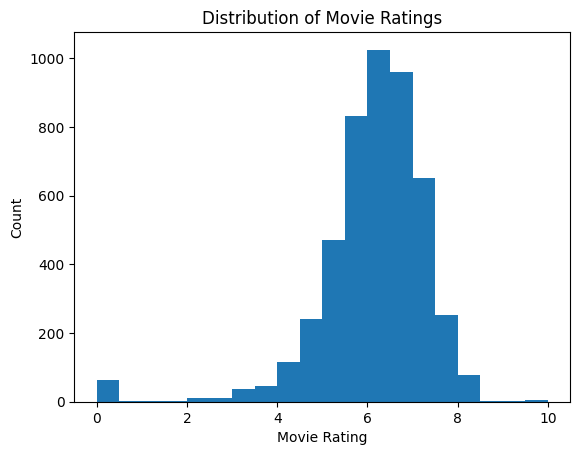

In [16]:
import matplotlib.pyplot as plt

plt.hist(movies["vote_average"], bins=20)
plt.xlabel("Movie Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()


In [17]:
movies.columns
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [18]:
movies.isna().sum().sort_values(ascending=False)

homepage                3091
tagline                  844
overview                   3
runtime                    2
release_date               1
id                         0
budget                     0
genres                     0
original_title             0
popularity                 0
original_language          0
keywords                   0
production_countries       0
production_companies       0
spoken_languages           0
revenue                    0
status                     0
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [19]:
movies_small = movies[
    ["id", "title", "genres", "budget", "revenue", "runtime",
     "vote_average", "vote_count", "popularity", "release_date"]]

In [20]:
movies_small.isna().sum().sort_values(ascending=False)



runtime         2
release_date    1
title           0
id              0
budget          0
genres          0
revenue         0
vote_average    0
vote_count      0
popularity      0
dtype: int64

In [21]:
movies_small["release_year"] = pd.to_datetime(
    movies_small["release_date"], errors="coerce"
).dt.year

movies_small = movies_small.dropna(subset=["vote_average"])
movies_small.head(3)


C:\Users\Nikhi\AppData\Local\Temp\ipykernel_91856\2100210896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_small["release_year"] = pd.to_datetime(


,id,title,genres,budget,revenue,runtime,vote_average,vote_count,popularity,release_date,release_year
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000,2787965087,162.0,7.2,11800,150.437577,2009-12-10,2009.0
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000,961000000,169.0,6.9,4500,139.082615,2007-05-19,2007.0
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000,880674609,148.0,6.3,4466,107.376788,2015-10-26,2015.0


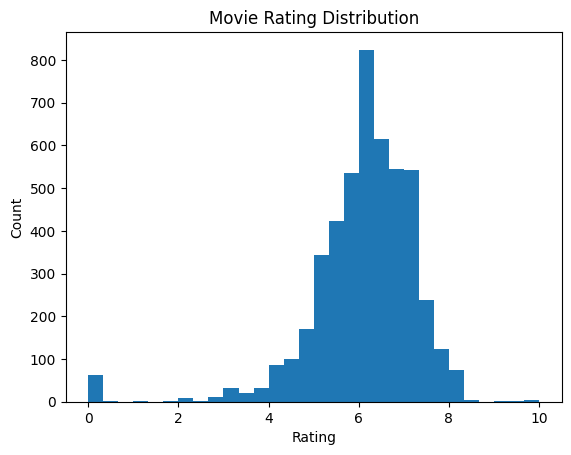

In [22]:
plt.hist(movies_small["vote_average"], bins=30)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Movie Rating Distribution")
plt.show()

The 'Movie Rating Distribution' graph shows that there are a few movies with an incredibly low rating between 0 and 2. Further investigation is needed to discover if there are any characteristics of these movies that might reveal why they have such low ratings. There is a peak in movie ratings around 6, with approximately equal movies on either side of 6.

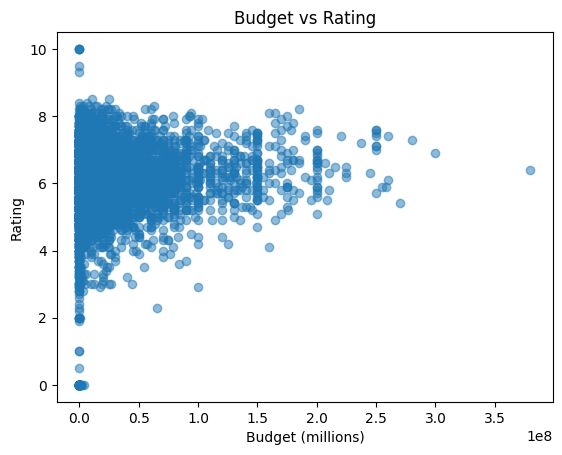

In [23]:
plt.scatter(movies_small["budget"], movies_small["vote_average"], alpha=0.5)
plt.xlabel("Budget (millions)")
plt.ylabel("Rating")
plt.title("Budget vs Rating")
plt.show()


In [24]:
(movies_small['budget'] == 0).sum()


np.int64(1037)

On the surface, the 'Budget vs Rating' chart shows that there is not much correlation between budget and rating. However, deeper analysis reveals that 1037 movies in the dataframe have a budget of 0, which is not realistically possible. There are also a few budget outliers with budgets over 2.5 million, but we will wait to see if they should be removed or kept. Regardless, it seems safe to say that a movie with a higher budget might not necessarily have a higher rating.

In [25]:
import ast

def extract_genres(genre_str):
    if pd.isna(genre_str):
        return []
    try:
        genres = ast.literal_eval(genre_str)
        return [g["name"] for g in genres]
    except:
        return []

extract_genres(movies_small.loc[0, "genres"])


['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [26]:
movies_small["genre_list"] = movies_small["genres"].apply(extract_genres)
movies_small[["title", "genre_list"]].head()


,title,genre_list
0,Avatar,"[Action, Adventure, Fantasy, Science Fiction]"
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]"
2,Spectre,"[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]"
4,John Carter,"[Action, Adventure, Science Fiction]"


In [27]:
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(movies_small["genre_list"])

genre_df = pd.DataFrame(
    genre_encoded,
    columns=mlb.classes_,
    index=movies_small.index
)

movies_model = pd.concat(
    [movies_small, genre_df],
    axis=1
)


In [28]:
movies_model["log_budget"] = np.log1p(movies_model["budget"])
movies_model["log_revenue"] = np.log1p(movies_model["revenue"])


In [29]:
features = [
    "log_budget",
    "log_revenue",
    "runtime",
    "popularity",
    "vote_count",
    "release_year"
]

X = movies_model[features + list(mlb.classes_)]
y = movies_model["vote_average"]
movies_model.loc[movies_model["budget"] == 0, "budget"] = pd.NA
movies_model.loc[movies_model["revenue"] == 0, "revenue"] = pd.NA

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X = movies_model[features + list(mlb.classes_)].copy()

X[features] = imputer.fit_transform(X[features])


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, r2


(0.6544677907573349, 0.33544019391811564)

In [31]:
coef_df = pd.DataFrame({
    "feature": X.columns,
    "coefficient": lr.coef_.flatten()
}).sort_values(by="coefficient", ascending=False)


coef_df.head(10)


,feature,coefficient
11,Documentary,0.986800
8,Animation,0.637930
15,Foreign,0.546300
12,Drama,0.537628
22,TV Movie,0.318175
10,Crime,0.161980
18,Music,0.110318
16,History,0.100514
25,Western,0.082094
19,Mystery,0.060991


In [32]:
coef_df.tail(10)


,feature,coefficient
0,log_budget,0.001224
4,vote_count,0.000242
5,release_year,-0.018676
17,Horror,-0.021426
21,Science Fiction,-0.050392
14,Fantasy,-0.073561
23,Thriller,-0.080865
7,Adventure,-0.092730
13,Family,-0.105364
6,Action,-0.172780


Features such as being a documentary or animated have the strongest positive influence on the predicted outcome,
while fantasy movies are strongly negatively associated.


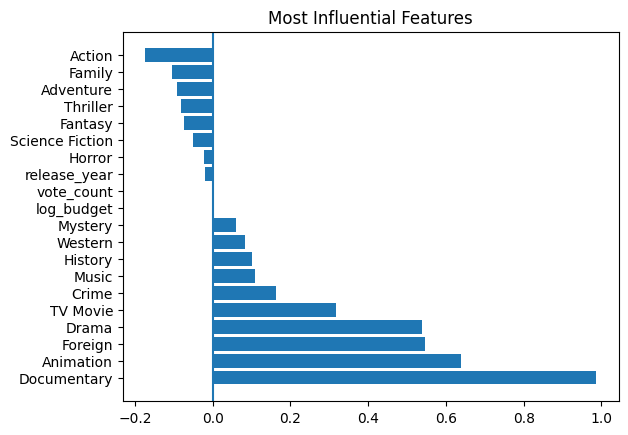

In [33]:
import matplotlib.pyplot as plt

top = coef_df.head(10)
bottom = coef_df.tail(10)

plot_df = pd.concat([top, bottom])

plt.figure()
plt.barh(plot_df["feature"], plot_df["coefficient"])
plt.axvline(0)
plt.title("Most Influential Features")
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae, rmse, r2

numpy.float64